<a href="https://colab.research.google.com/github/sarveshahuja1992/Rise-and-fall-of-programming-languages/blob/master/Rise_and_Fall_of_Programming_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we are going to look at the popularity of programming languages over several years. 

The data is taken from the stackoverflow API that gives the percentage of questions asked on Stackoverflow questions  each month and the tags for programming languages these questions are associated with. 

The timeline for this data is from 08-2008 to 09-2020.

I am going to create some visualizations to show the popularity of some programming languages that are highly used.

In [19]:
#Importing libraries and the data in json format from stackoverflow API
import requests
import pandas as pd
import numpy as np
r = requests.get('https://insights.stackoverflow.com/trends/get-data')
j = r.json()

In [2]:
#Creating a dataframe from json tagpercents and tags as index
new = j['TagPercents']
x = pd.DataFrame.from_dict(new, orient= 'index')
x['index1'] = x.index
x


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,index1
.htaccess,0.105960,0.086287,0.069238,0.127348,0.100301,0.152546,0.200838,0.212115,0.217648,0.207331,0.214117,0.239681,0.342139,0.241406,0.269183,0.230662,0.307002,0.275636,0.276423,0.310212,0.311733,0.238155,0.342917,0.309224,0.319009,0.377985,0.340388,0.336292,0.375750,0.374362,0.362275,0.377133,0.390367,0.323968,0.333886,0.373372,0.342078,0.394582,0.410909,0.405227,...,0.307554,0.305882,0.312347,0.293644,0.244258,0.286704,0.306483,0.277575,0.230109,0.215754,0.211662,0.205744,0.207222,0.205971,0.200749,0.197993,0.184532,0.195310,0.195171,0.188045,0.203317,0.186523,0.177834,0.157148,0.167317,0.196432,0.167274,0.156379,0.143175,0.162910,0.170808,0.170430,0.143643,0.135871,0.137539,0.139436,0.133781,0.133464,0.137894,.htaccess
.net,11.708609,11.080751,10.842623,9.574976,9.470077,9.699358,9.295920,8.810182,8.161817,7.663420,7.037328,6.735977,6.565361,6.071811,5.944221,5.328825,5.341840,5.243815,5.350923,5.412331,5.048067,4.801828,4.488603,4.305983,4.328738,4.422423,3.991679,3.935917,3.745935,3.871762,3.898999,3.681775,3.577313,3.534647,3.481525,3.409136,3.117961,3.048685,2.872411,2.719888,...,0.891292,0.866002,0.847000,0.880340,0.822138,0.827562,0.842827,0.903105,0.821983,0.847515,0.900765,0.879147,0.894595,0.886182,0.865728,0.890340,0.862937,0.824556,0.833849,0.883261,0.760878,0.751329,0.739207,0.755491,0.771519,0.724160,0.820231,0.744539,0.781115,0.877107,0.824388,0.830256,0.728973,0.692078,0.681421,0.713269,0.737314,0.719000,0.725821,.net
.net-2.0,0.609272,0.395484,0.636987,0.509392,0.451354,0.324159,0.418890,0.281176,0.227111,0.215155,0.210549,0.217892,0.126375,0.079450,0.111003,0.112710,0.080088,0.056024,0.071915,0.067437,0.064358,0.073576,0.068583,0.061183,0.071066,0.059163,0.064611,0.044743,0.046246,0.045225,0.047253,0.032837,0.027284,0.030997,0.040471,0.031861,0.032712,0.030428,0.025682,0.023891,...,0.001681,0.001702,0.002484,0.002960,0.000596,0.001385,0.002512,0.001973,0.001165,0.000620,0.001804,0.002613,0.002527,0.001907,0.001394,0.001880,0.000671,0.001520,0.000000,0.001373,0.001247,0.000000,0.000000,0.000738,0.000664,0.001466,0.000000,0.001266,0.000577,0.001303,0.000000,0.000592,0.000000,0.001363,0.000896,0.000975,0.000507,0.000568,0.000000,.net-2.0
.net-3.5,1.033113,0.517725,0.533130,0.501433,0.543297,0.489417,0.504964,0.537687,0.440028,0.395102,0.331882,0.314387,0.246586,0.247517,0.266408,0.220178,0.226915,0.235299,0.240466,0.196532,0.275532,0.253645,0.265309,0.244733,0.222675,0.174202,0.195408,0.230930,0.143074,0.125625,0.159934,0.108463,0.110184,0.096990,0.088025,0.070692,0.075706,0.061837,0.057290,0.049620,...,0.007843,0.004540,0.001863,0.004144,0.004170,0.003463,0.003140,0.007893,0.006408,0.003100,0.003007,0.005878,0.008213,0.001907,0.005576,0.003133,0.005368,0.006840,0.009422,0.005490,0.002495,0.001963,0.001991,0.002213,0.001992,0.004398,0.001467,0.001266,0.000577,0.002607,0.002372,0.003551,0.002152,0.000909,0.000000,0.002925,0.001013,0.001136,0.000577,.net-3.5
2d,0.026490,0.079097,0.083085,0.031837,0.117018,0.025424,0.051644,0.064128,0.042583,0.039119,0.035686,0.049804,0.064729,0.036669,0.038851,0.034075,0.026696,0.024650,0.044947,0.025048,0.050280,0.050342,0.034292,0.041340,0.028427,0.042729,0.045700,0.025980,0.044801,0.028894,0.048465,0.042788,0.044074,0.043996,0.050589,0.042813,0.041124,0.042207,0.047413,0.041350,...,0.020168,0.021565,0.019250,0.020129,0.026213,0.029086,0.025122,0.023679,0.017477,0.022319,0.022249,0.015676,0.023376,0.024157,0.027185,0.020050,0.039590,0.022039,0.021536,0.031570,0.031184,0.029451,0.015262,0.018445,0.018591,0.012460,0.024944,0.027224,0.030598,0.035840,0.022537,0.020120,0.027975,0.021812,0.027329,0.031202,0.021790,0.028397,0.025963,2d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [3]:
#converting wide dataframe to long in order to add value for months and year and increase the data readability
new_df = x.melt(id_vars=['index1'],value_name='TagPercent')
new_df

,index1,variable,TagPercent
0,.htaccess,0,0.105960
1,.net,0,11.708609
2,.net-2.0,0,0.609272
3,.net-3.5,0,1.033113
4,2d,0,0.026490
...,...,...,...
428943,karate,145,0.043849
428944,google-cloud-firestore,145,0.467918
428945,puppeteer,145,0.130971
428946,blazor,145,0.162704


In [18]:
# Now, I have extracted the Month and Year from JSON 
dict1 = j['Month'],j['Year']
df1=pd.DataFrame(dict1).transpose()
df1.columns = ['Month', 'Year']
df1
badadf = pd.DataFrame(np.repeat(df1.values,2744,axis=0))
badadf.columns = df1.columns
badadf

,Month,Year
0,8,2008
1,8,2008
2,8,2008
3,8,2008
4,8,2008
...,...,...
400619,9,2020
400620,9,2020
400621,9,2020
400622,9,2020


In [5]:
#Removing Null values and creating a final dataframe with tag percent and month and year 
new_df['Month'] = badadf['Month']
new_df = new_df[new_df['Month'].notna()]
new_df['Year'] = badadf['Year']
new_df['Date'] = new_df['Month'].map(str)+ '-' +new_df['Year'].map(str)
new_df['Date'] = pd.to_datetime(new_df['Date'], format='%m-%Y').dt.strftime('%m-%Y')
new_df.columns = ['tag','variable','percentage of questions yearly','Month','Year','Date']
data = new_df
data['Date']=pd.to_datetime(data['Date'], format='%m-%Y')
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,tag,variable,percentage of questions yearly,Month,Year,Date
0,.htaccess,0,0.105960,8,2008,2008-08-01
1,.net,0,11.708609,8,2008,2008-08-01
2,.net-2.0,0,0.609272,8,2008,2008-08-01
3,.net-3.5,0,1.033113,8,2008,2008-08-01
4,2d,0,0.026490,8,2008,2008-08-01
...,...,...,...,...,...,...
400619,aspectj,136,0.011730,9,2020,2020-09-01
400620,associations,136,0.013684,9,2020,2020-09-01
400621,asterisk,136,0.014336,9,2020,2020-09-01
400622,atomic,136,0.011078,9,2020,2020-09-01


In [6]:
# Selecting tags for popular programming languages R, SQL, Python, C++, C#, Java, Javascript and also Pandas python package. Creating smaller dataframes for each language.
r_programming =  data['tag'] =='r'
questionsonr = data[r_programming]
python_prog =  data['tag'] =='python'
questionsonpython = data[python_prog]
questionsonpython

,tag,variable,percentage of questions yearly,Month,Year,Date
711,python,0,3.284768,8,2008,2008-08-01
3649,python,1,3.897318,9,2008,2008-09-01
6587,python,2,3.531122,10,2008,2008-10-01
9525,python,3,3.597580,11,2008,2008-11-01
12463,python,4,3.686058,12,2008,2008-12-01
...,...,...,...,...,...,...
388527,python,132,13.370567,5,2020,2020-05-01
391465,python,133,12.541177,6,2020,2020-06-01
394403,python,134,13.470085,7,2020,2020-07-01
397341,python,135,13.595899,8,2020,2020-08-01


In [7]:
pandas = data['tag'] == 'pandas'
questionsonpandas = data[pandas]
sql = data['tag'] == 'sql'
questionsonsql = data[sql]
questionsonsql
Csharp = data['tag'] == 'c#'
questionsonCsharp = data[Csharp]
C = data['tag'] == 'c'
questionsonc = data[C]
Cpp = data['tag'] == 'c++'
questionsoncpp = data[Cpp]
Java = data['tag'] == 'java'
questionsonjava = data[Java]
Javascript = data['tag'] == 'javascript'
questionsonjavascr = data[Javascript]
questionsonjavascr

,tag,variable,percentage of questions yearly,Month,Year,Date
471,javascript,0,4.291391,8,2008,2008-08-01
3409,javascript,1,4.601999,9,2008,2008-09-01
6347,javascript,2,5.019733,10,2008,2008-10-01
9285,javascript,3,4.616364,11,2008,2008-11-01
12223,javascript,4,5.240722,12,2008,2008-12-01
...,...,...,...,...,...,...
388287,javascript,132,11.289708,5,2020,2020-05-01
391225,javascript,133,11.058451,6,2020,2020-06-01
394163,javascript,134,10.558405,7,2020,2020-07-01
397101,javascript,135,10.485873,8,2020,2020-08-01


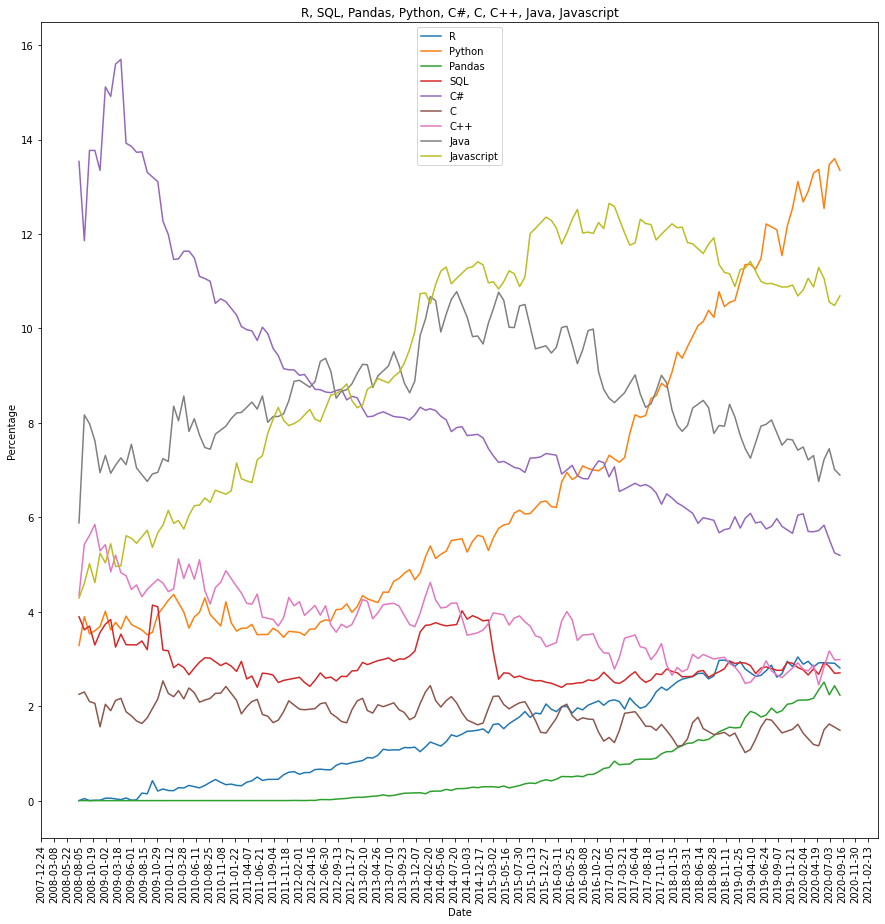

In [8]:
#Plotting each programming language from smaller dataframes created against the dates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15,15))
plt.plot_date(questionsonr['Date'],questionsonr['percentage of questions yearly'] , label='R', xdate=True, ydate=False, linestyle='solid', marker='None')
plt.plot_date(questionsonpython['Date'],questionsonpython['percentage of questions yearly'] , label='Python', xdate=True, ydate=False, linestyle='solid', marker='None')
plt.plot_date(questionsonpandas['Date'],questionsonpandas['percentage of questions yearly'] , label='Pandas', xdate=True, ydate=False, linestyle='solid', marker='None')
plt.plot_date(questionsonsql['Date'],questionsonsql['percentage of questions yearly'] , label='SQL', xdate=True, ydate=False, linestyle='solid', marker='None')
plt.plot_date(questionsonCsharp['Date'],questionsonCsharp['percentage of questions yearly'] , label='C#', xdate=True, ydate=False, linestyle='solid', marker='None')
plt.plot_date(questionsonc['Date'],questionsonc['percentage of questions yearly'] , label='C', xdate=True, ydate=False, linestyle='solid', marker='None')
plt.plot_date(questionsoncpp['Date'],questionsoncpp['percentage of questions yearly'] , label='C++', xdate=True, ydate=False, linestyle='solid', marker='None')
plt.plot_date(questionsonjava['Date'],questionsonjava['percentage of questions yearly'] , label='Java', xdate=True, ydate=False, linestyle='solid', marker='None')
plt.plot_date(questionsonjavascr['Date'],questionsonjavascr['percentage of questions yearly'] , label='Javascript', xdate=True, ydate=False, linestyle='solid', marker='None')
plt.xlabel('Date')
plt.xticks(rotation=90)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 75))
plt.ylabel('Percentage')
plt.title("R, SQL, Pandas, Python, C#, C, C++, Java, Javascript")
plt.legend()
plt.show()

Now I'll get the popular programming language for each year. The most popular programming language in a year is the one with maximum number of questions for that year.

Sorting these values by Year and Percentage of questions and only keeping the programming language with the most questions for each year

In [22]:
df = data.sort_values('Year', ascending=False)

In [24]:
df = df.sort_values('percentage of questions yearly', ascending=False)
df = df.drop_duplicates(['Year'])
df = df.sort_values(by ='Year' )
df

,tag,variable,percentage of questions yearly,Month,Year,Date
5993,c#,2,13.771377,10,2008,2008-10-01
23621,c#,8,15.699077,4,2009,2009-04-01
47125,c#,16,11.989108,1,2010,2010-01-01
82381,c#,28,10.283980,2,2011,2011-02-01
129739,java,44,9.366774,7,2012,2012-07-01
...,...,...,...,...,...,...
261953,javascript,89,12.519479,7,2016,2016-07-01
279581,javascript,95,12.647790,1,2017,2017-01-01
311899,javascript,106,12.215758,1,2018,2018-01-01
373837,python,127,12.545762,12,2019,2019-12-01


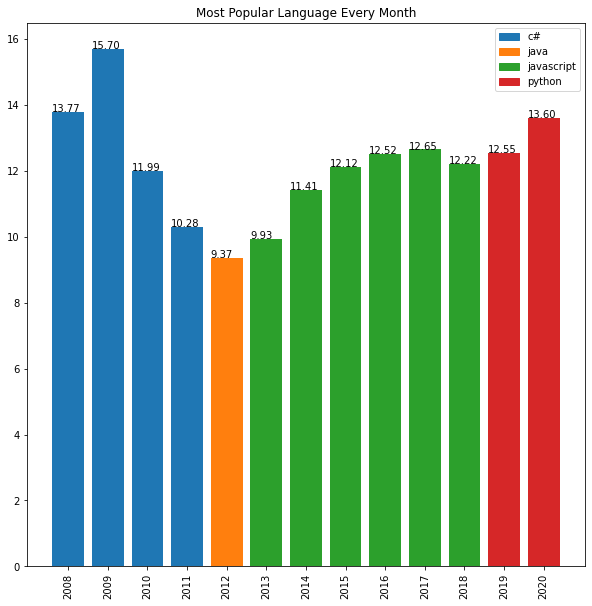

In [26]:
#Creating a barplot for each year with the most popular programming language
import matplotlib.patches as mpatches
from datetime import datetime
#df['Date'] = df['Date'].dt.strftime('%Y%m%d')
plt.figure(figsize=(10,10))
colors = {'c#':'tab:blue','java':'tab:orange','javascript':'tab:green','python':'tab:red'}
bars = plt.bar(df['Year'],df['percentage of questions yearly'],color=df['tag'].apply(lambda x: colors[x]))
plt.title("Most Popular Language Every Month")
plt.xticks(rotation=90)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 5))
patchList = []
for key in colors:
        data_key = mpatches.Patch(color=colors[key], label=key)
        patchList.append(data_key)
plt.legend(handles=patchList)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, '%.2f'%(yval))

Similar to the programming languages, Now we look at the popular mobile os platforms

In [15]:
winp = data['tag'] == 'windows-phone'
questionsonwindowsp = data[winp]
adr = data['tag'] == 'android'
questionsonadr = data[adr]
ios = data['tag'] == 'ios'
questionsonios = data[ios]

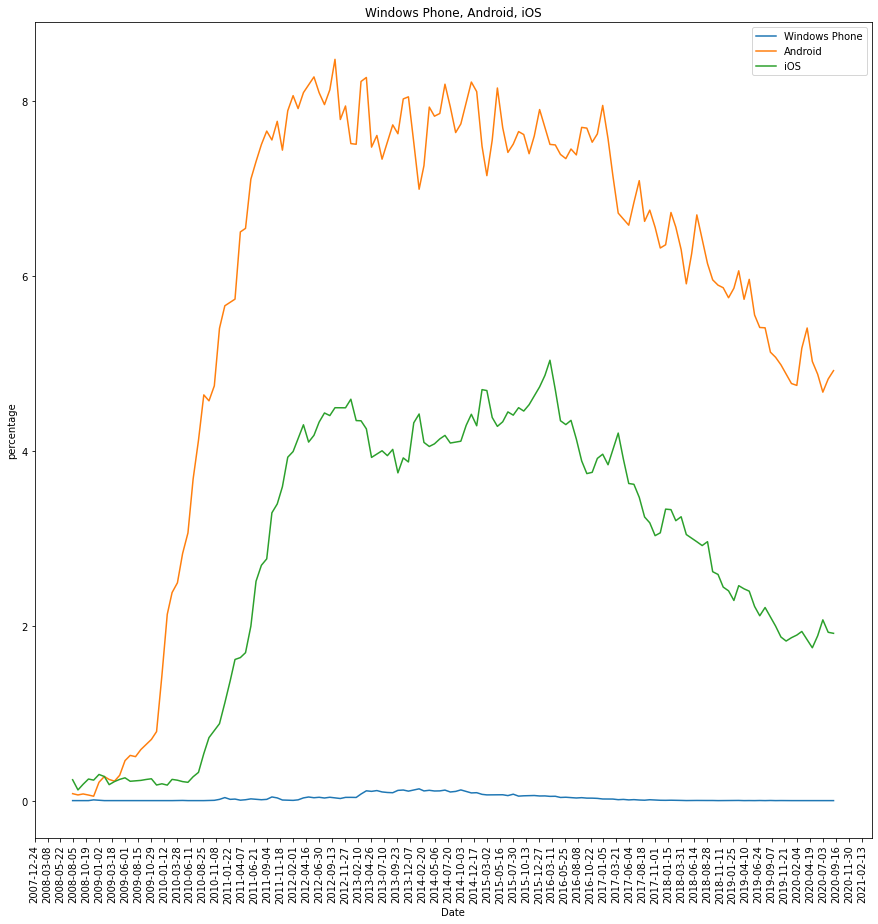

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
plt.plot(questionsonwindowsp['Date'],questionsonwindowsp['percentage of questions yearly'] , label='Windows Phone')
plt.plot(questionsonadr['Date'],questionsonadr['percentage of questions yearly'] , label='Android')
plt.plot(questionsonios['Date'],questionsonios['percentage of questions yearly'] , label='iOS')
plt.xlabel('Date')
plt.ylabel('percentage')
plt.xticks(rotation=90)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 75))
plt.title("Windows Phone, Android, iOS")
plt.legend()
plt.show()